In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
# from einops import rearrange, repeat
# import rosbags
import json
import open3d as o3d
import pandas as pd
import os
import copy
from utility import listFiles, quickVizNumpy
from scipy.spatial.transform import Rotation as R
from numpy import cos, sin, sqrt, arctan2, array
import torch.nn as nn
### fucking around
from pretrain import loadDataFromRegisteredSlam, cart2sph, preProcess
from train import getSamples, getUpSamples, getSpacing
from visualize import visualizeDir


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
name = r'building_with_rotation'
path = r'datasets/registered/' + name + r'.json'
data = loadDataFromRegisteredSlam(path)
# training_data = preProcess(data)
# np.random.shuffle(training_data)

In [3]:
def vizTwoPointClouds(points1, points2):
    """
    Visualize two point clouds with different colors using Open3D.
    
    Parameters:
    - points1 (numpy.ndarray): The first n*3 numpy array of points.
    - points2 (numpy.ndarray): The second n*3 numpy array of points.
    """
    
    # Convert numpy arrays to Open3D point clouds
    pcd1 = o3d.geometry.PointCloud()
    pcd1.points = o3d.utility.Vector3dVector(points1)
    pcd1.paint_uniform_color([1, 0, 0])  # Paint red
    
    pcd2 = o3d.geometry.PointCloud()
    pcd2.points = o3d.utility.Vector3dVector(points2)
    pcd2.paint_uniform_color([0, 0, 1])  # Paint blue
    
    # Visualize the point clouds
    o3d.visualization.draw_geometries([pcd1, pcd2])


In [4]:
model_path = r'local/models/version5_trial0.pth'
output_path = r'local/visualize/v5t0.csv'

position = array([0,0,0])
direction = array([1,0,0])
pcd_evel = visualizeDir(model_path, output_path, position, direction)


Visualizing output saved to local/visualize/v5t0.csv


In [10]:
data['5']['pose_rotation']  a                                                                                                                                   RTFT5

SyntaxError: invalid syntax (3327389916.py, line 1)

In [5]:
pcd_gt = np.array(data['5']['point_cloud'])

In [13]:
vizTwoPointClouds(pcd_evel, pcd_gt)

In [18]:
test = torch.linspace(0,5,100)


def warpd2u(d, focus = torch.tensor(1)):
    """ Map depth between 0 to +inf, to u between 0 to 1"""
    sigmoid = nn.Sigmoid()
    offset = sigmoid(-focus)
    d_neutral = d - focus
    u = (sigmoid(d_neutral) - offset) / (1-offset)
    return u


output = warpd2u(test)

In [ ]:
y = output.detach().numpy()
x = test.detach().numpy()
plt.figure(figsize=(10, 6))
plt.plot(x, y,  label='Original data')
plt.legend()
plt.show()

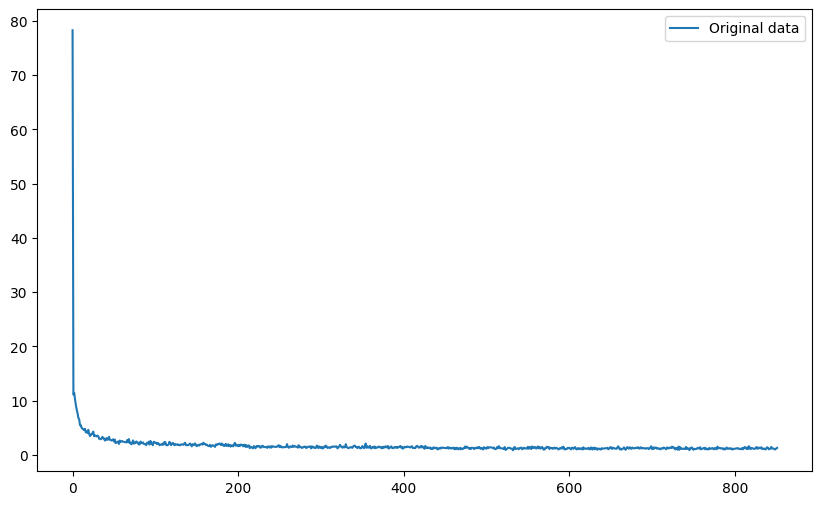

In [23]:
losses = np.load('v5trial0_losses.npy')

plt.figure(figsize=(10, 6))
plt.plot(losses,  label='Original data')
plt.legend()
plt.show()